# Image Analysis and Processing
## First Assignment



*   Marios Gravrielatos 7115152100023
*   Dimitra Paranou 7115152100034



In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import skimage.util as util
from skimage.util import random_noise
import PIL
from PIL import Image, ImageEnhance
from IPython.display import display 

### Exercise 1

In [ ]:
image1 = cv.imread('paris.jpg',0) # loads in grayscale

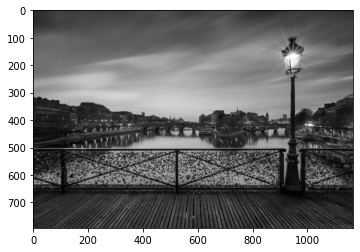

In [ ]:
plt.imshow(image1, cmap='gray')

In [ ]:
def custom_tranformation_function(img):
  rows = img.shape[0]
  cols = img.shape[1]
  new_image = np.ones((rows, cols), dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      if img[i,j] >= 0 and img[i,j] < 30:
        new_image[i,j] = 10
      elif img[i,j] >= 30 and img[i,j] < 60:
        new_image[i,j] = 20
      elif img[i,j] >= 60 and img[i,j] < 90:
        new_image[i,j] = 50
      elif img[i,j] >= 90 and img[i,j] < 120:
        new_image[i,j] = 70
      elif img[i,j] >= 120 and img[i,j] < 160:
        new_image[i,j] = 100
      elif img[i,j] >= 160 and img[i,j] < 190:
        new_image[i,j] = 140
      elif img[i,j] >= 190 and img[i,j] < 220:
        new_image[i,j] = 180
      elif img[i,j] >= 220 and img[i,j] <= 255:
        new_image[i,j] = 200
  return new_image

In [ ]:
tranformated_img = custom_tranformation_function(image1)

**a) Explain the impact of the following transformation function on a grayscale image, in terms of intensity values and brightness.**

The function described in exercise 1 of the assignment and implemented in the `custom_tranformation_function` function, performs grayscale quantization, meaning we are dividing the signal into quanta. The original image has 256 levels and the transformed image has 8 levels, as we can see from the following plot: 

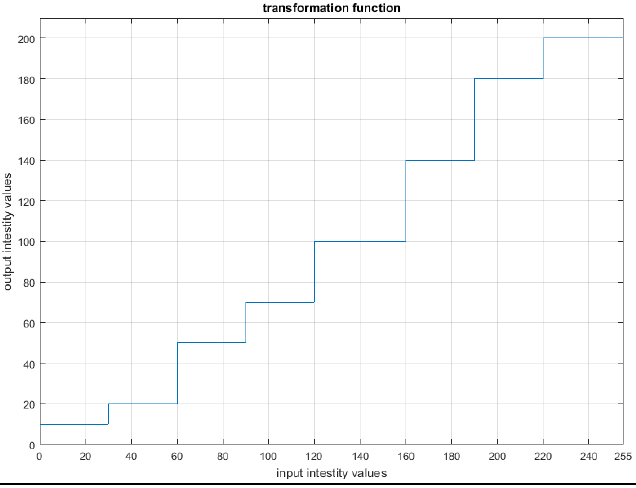

The transformed image is somehow distorted in comparison to the original image and details are missing. Furthermore, false colors and edges appear on the image. Intensity values of the input image are decreased after the transformation (exception the intensity values 0-10 of the original image which are increased to 10). In general, the transformed image will be darker that the original one and the intensity values will have a smaller range (10-200 instead of 0-256).

**b) Verify your answer by a applying the transformation on an image of your choice (include input/output images in your answer)**

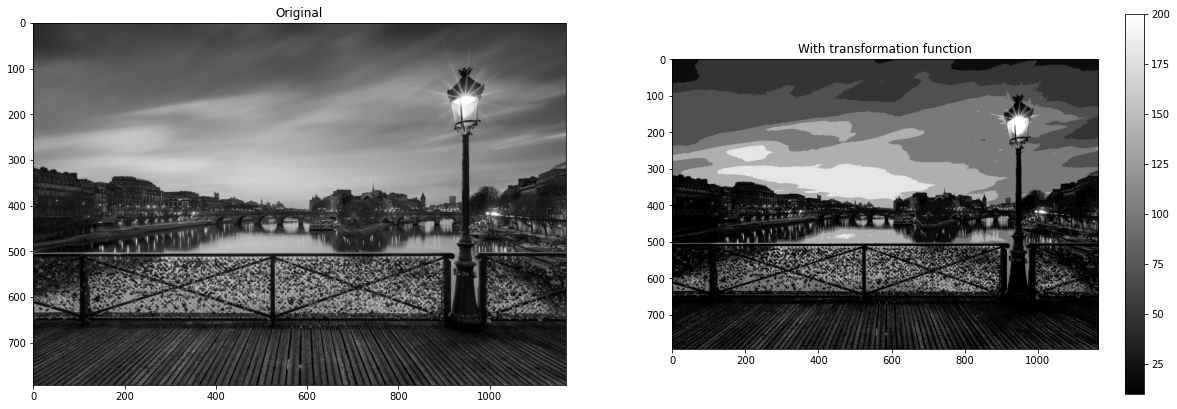

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21,7))
a = axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Original')


b = axes[1].imshow(tranformated_img, cmap='gray')
axes[1].set_title('With transformation function')
fig.colorbar(b)

plt.show()

### Exercise 2

**Propose a method for enhancing the image “nature_dark_forest.jpg”.**

In [2]:
#The gamma function
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0/gamma
    table = np.array([((i/255.0)**invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv.LUT(image, table)

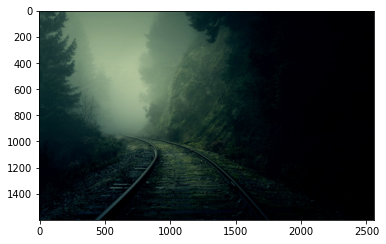

In [3]:
# Opens the image file
image2 = Image.open('nature_dark_forest.jpg') 
plt.imshow(image2)

Step 1: Enhance brightness of the image by a factor of 1.5

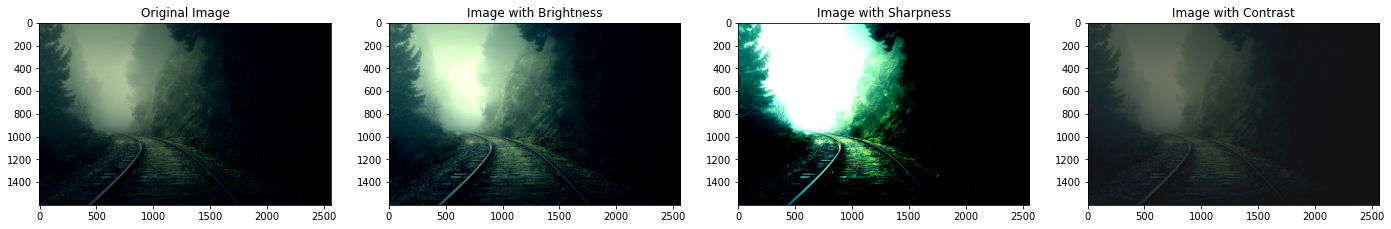

In [4]:
# Enhance Brightness
curr_bri = ImageEnhance.Brightness(image2)
new_bri = 1.5
  
# Brightness enhanced by a factor of 1.5
img_brightened = curr_bri.enhance(new_bri)

# Enhance Sharpness
curr_sharp = ImageEnhance.Contrast(image2)
new_sharp = 4.3
  
# Sharpness enhanced by a factor of 4.3
img_sharped = curr_sharp.enhance(new_sharp)

# Enhance Contrast
curr_con = ImageEnhance.Contrast(image2)
new_con = 0.5
  
# Contrast enhanced by a factor of 0.5
img_contrasted = curr_con.enhance(new_con)

fig, axes=plt.subplots(1,4, figsize=(24,7))


# shows updated image in image viewer
axes[0].imshow(image2)
axes[0].set_title("Original Image")
axes[1].imshow(img_brightened)
axes[1].set_title("Image with Brightness")
axes[2].imshow(img_sharped)
axes[2].set_title("Image with Sharpness")
axes[3].imshow(img_contrasted)
axes[3].set_title("Image with Contrast")
plt.show()

Step 2: Apply gamma correction with gamma=2.5

Text(0.5, 1.0, 'Image with Brightness and Gamma correction')

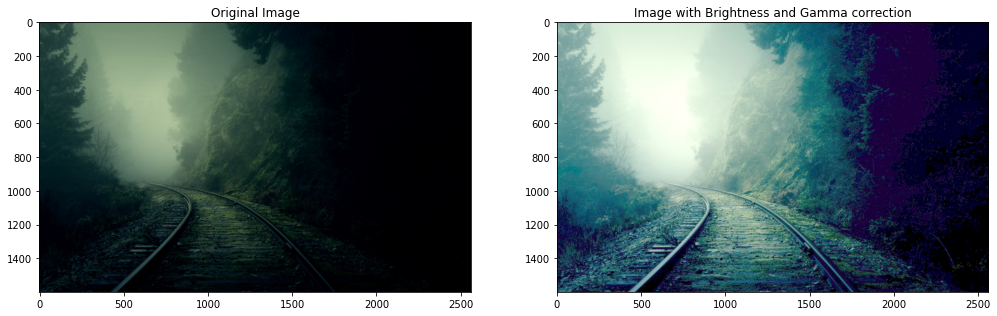

In [5]:
gamma = 2.5
adjusted = adjust_gamma(np.asarray(img_brightened), gamma=gamma)
final = Image.fromarray(adjusted, 'RGB')

fig, axes=plt.subplots(1,2, figsize=(17,7))
axes[0].imshow(image2)
axes[0].set_title("Original Image")
axes[1].imshow(final)
axes[1].set_title("Image with Brightness and Gamma correction")

After increasing the brightness of the image by a factor of 1.5 and applying gamma correction (2.5) we can observe that we are able to see the darker areas of the original image with greater detail.

### Exercise 3
**Propose a method for “improving” the image “pollen-500x430px-96dpi.jpg”.**

In [69]:
#The gamma function
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0/gamma
    table = np.array([((i/255.0)**invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv.LUT(image, table)

Step 1: Apply gamma correction with gamma=2.5

Step 2: Apply the detailEnhance filter. The filter enhances the details, and makes the image look sharper.
* sigma_s: controls the size of the neighborhood
* sigma_r: controls the how dissimilar colors within the neighborhood will be averaged

After enhancing the image we are able to distinguish the darker areas of the original image with greater detail as well as the edges of the image.

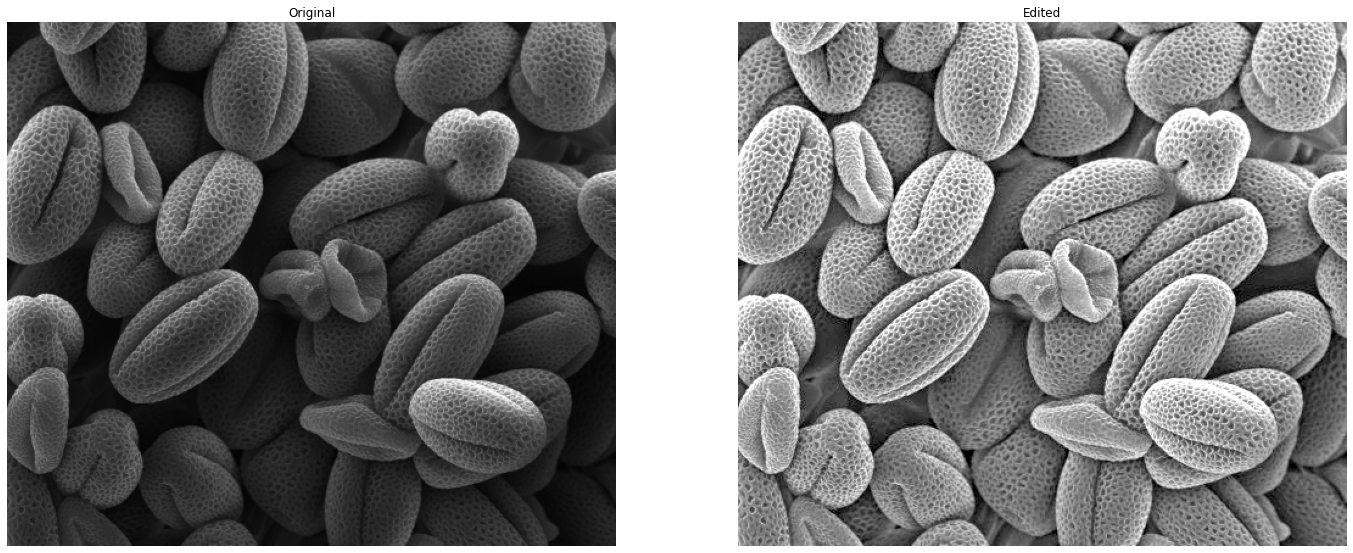

In [71]:
img3 = cv.imread('pollen-500x430px-96dpi.jpg')

gamma = 2.5
adjusted = adjust_gamma(img3, gamma=gamma)

dst = cv.detailEnhance(adjusted, sigma_s=10, sigma_r=0.15)

fig, axes = plt.subplots(1,3, figsize=(24,12))
plt.subplot(121), plt.imshow(img3, cmap='gray'), plt.title('Original'),plt.axis('off')
plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Edited'),plt.axis('off')
plt.show()

### Exercise 4
**Propose a method for sharpening the image “First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg”.**

For sharpening the image, we will apply high pass filters to let the high frequency components pass, and reduces or eliminates low frequency components

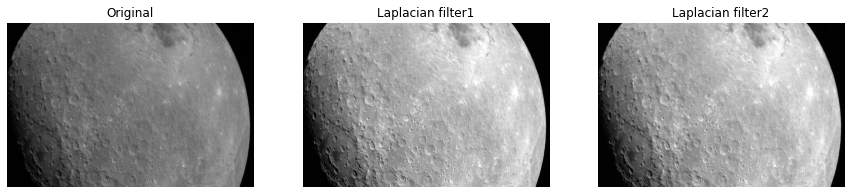

In [ ]:
image4 = cv.imread('First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg')

fig, axes = plt.subplots(1,3, figsize=(15,7))

plt.subplot(131), plt.imshow(image4), plt.title('Original'),plt.axis('off')

# define the first kernel 
kernel1 = np.array([[0, -1, 0],
                   [-1, 5.5,-1],
                   [0, -1, 0]])

# define the second kernel 
kernel2 = np.array([[1, -2, 1],
                   [-2, 5.5,-2],
                   [1, -2, 1]])

# apply the kernels to the images and plot them
dst1=cv.filter2D(image4, ddepth=-1, kernel=kernel1)
dst2=cv.filter2D(image4, ddepth=-1, kernel=kernel2)
plt.subplot(132), plt.imshow(dst1), plt.title('Laplacian filter1'),plt.axis('off')
plt.subplot(133), plt.imshow(dst2), plt.title('Laplacian filter2'),plt.axis('off')
plt.show()

### Exercise 5
**One combined enhancement methods (e.g. arithmetic operations, gray level transformations, and/or sharpening spatial filters) to convert the “image_1” to “image_2”.**

In [72]:
# read the appropriate images in grascale
image5_1 = cv.imread('image_1.jpg', 0)
image5_2 = cv.imread('image_2.jpg', 0)

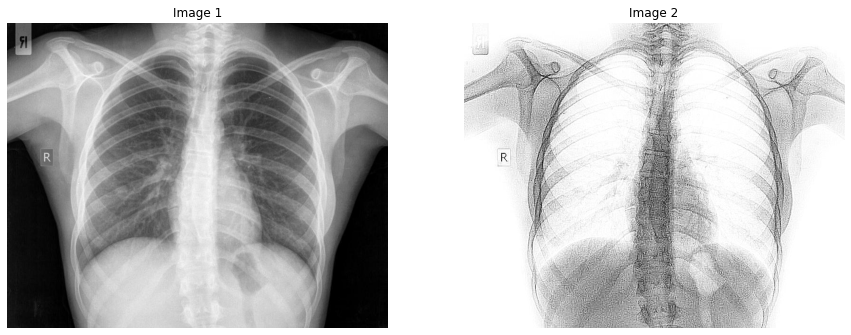

In [73]:
# plot the images
fig, axes = plt.subplots(1,3, figsize=(15,7))
plt.subplot(121), plt.imshow(image5_1, cmap='gray'), plt.title('Image 1'),plt.axis('off')
plt.subplot(122), plt.imshow(image5_2, cmap='gray'), plt.title('Image 2'),plt.axis('off')
plt.show()

#### a) Try to guess the processing steps she adopted. [Note the dynamic range and brightness of the enhanced image, and the noise introduced.]

For converting the image 1 to image 2 we follow the pipeline that is describes below:


1.   Get from image 1 its photographic negative by subtracting
from 255 the values of the image
2.   Apply a 5x5 kernel to the negative image, so as to have a new image whose
pixels have gray values calculated from the gray values under the mask. In this way, we also introduce some noise to the picture.
3. We apply gamma correction (2) so as to make the image appear brighter 
4. Finally, in the image with gamma correction, we enhance the contrast of the image by a factor of 1.1

The results are really close to image 2


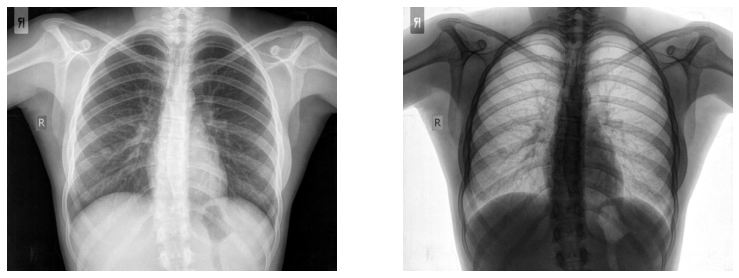

In [75]:
# get the photographic negative
res = (255-image5_1)
fig, axes = plt.subplots(1, 3, figsize=(13,7))
plt.subplot(121), plt.imshow(image5_1, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(res, cmap='gray'), plt.axis('off')
plt.show()

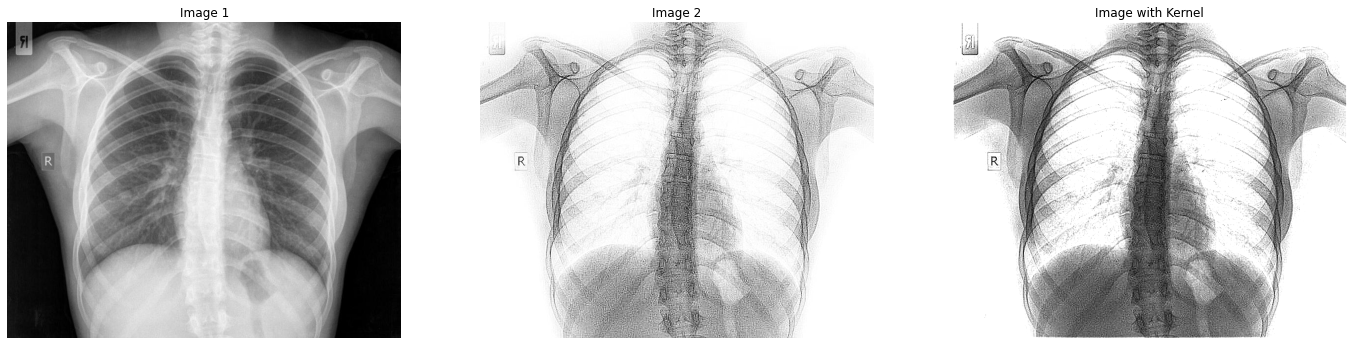

In [76]:
# define the 5x5 kernel
kernel = np.array([ [0, 0, -1, 0, 0],
                    [0, 0, -1, 0, 0],
                    [-1,-1, 9.8, -1,-1],
                    [0, 0, -1, 0, 0],
                    [0, 0, -1, 0, 0]])

# apply the kernel to the image
dst = cv.filter2D(res, ddepth=-1, kernel=kernel, borderType=cv.BORDER_CONSTANT)

fig, axes = plt.subplots(1, 3, figsize=(24,12))
plt.subplot(131), plt.imshow(image5_1, cmap='gray'), plt.title('Image 1'),plt.axis('off')
plt.subplot(132), plt.imshow(image5_2, cmap='gray'), plt.title('Image 2'),plt.axis('off')
plt.subplot(133), plt.imshow(dst, cmap='gray'), plt.title('Image with Kernel'),plt.axis('off')
plt.show()

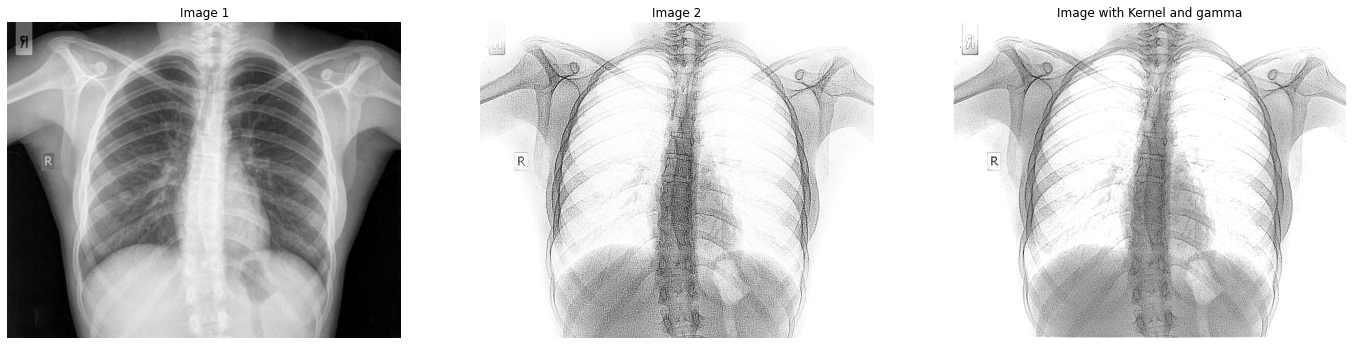

In [77]:
# define gamma correction
gamma = 2
# adjust gamma to the image
adjusted = adjust_gamma(dst, gamma=gamma)

fig, axes = plt.subplots(1, 3, figsize=(24,12))
plt.subplot(131), plt.imshow(image5_1, cmap='gray'), plt.title('Image 1'),plt.axis('off')
plt.subplot(132), plt.imshow(image5_2, cmap='gray'), plt.title('Image 2'),plt.axis('off')
plt.subplot(133), plt.imshow(adjusted, cmap='gray'), plt.title('Image with Kernel and gamma'),plt.axis('off')
plt.show()

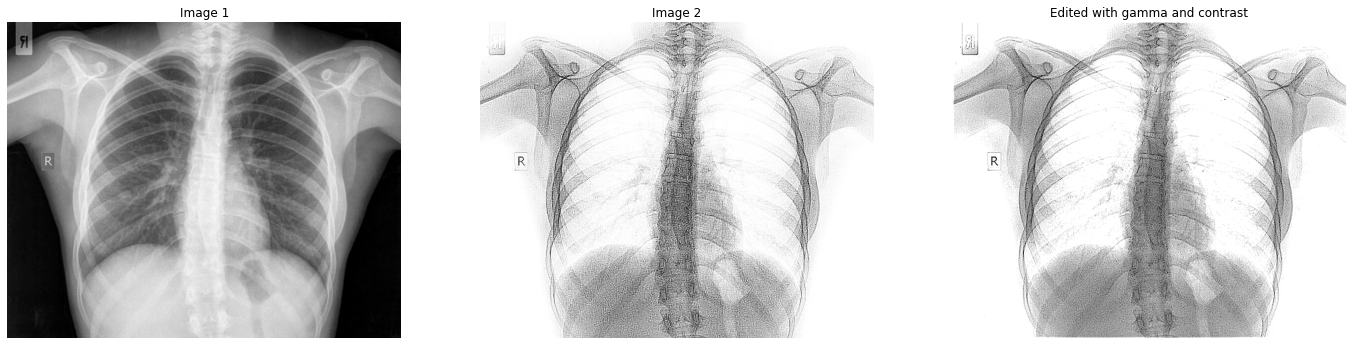

In [78]:
# Enhance Contrast
curr_con = ImageEnhance.Contrast(Image.fromarray(adjusted))
new_con = 1.1
  
# Contrast enhanced by a factor of 1.1
img_contrasted = curr_con.enhance(new_con)

fig, axes = plt.subplots(1, 3, figsize=(24,12))
plt.subplot(131), plt.imshow(image5_1, cmap='gray'), plt.title('Image 1'),plt.axis('off')
plt.subplot(132), plt.imshow(image5_2, cmap='gray'), plt.title('Image 2'),plt.axis('off')
plt.subplot(133), plt.imshow(img_contrasted, cmap='gray'), plt.title('Edited with gamma and contrast'),plt.axis('off')
plt.show()

#### b) Propose a pipeline of processes with the aim of approximating “image_1” starting from “image_2”.

For converting the image 2 to image 1 the following pipeline was used:

1.   Get from image 2 its photographic negative by subtracting from 255 the values of the image
2.   In the picture above, apply GaussianBlur so as to remove the noise and make it smoother
3. In the blurred image, we enhanced the brightness by a factor of 2.5
4. Then, in the brightened image, we applied histogram equalization so as to convert it to the full spectrum. We used a transformation function which maps the input pixels in darker region to output pixels in the full region
5. Finally, we applied a 3x3 blur to improve even more the image

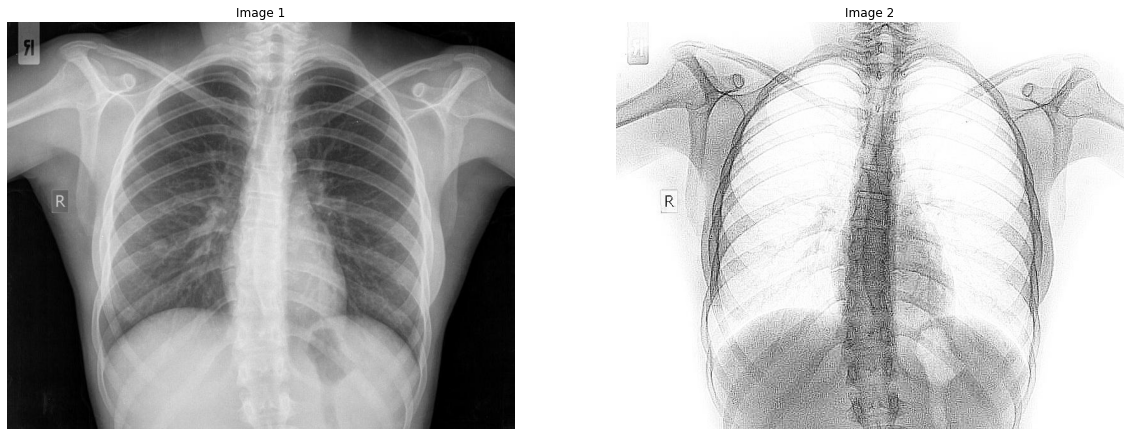

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,15))
plt.subplot(121), plt.imshow(image5_1, cmap='gray'), plt.title('Image 1'),plt.axis('off')
plt.subplot(122), plt.imshow(image5_2, cmap='gray'), plt.title('Image 2'),plt.axis('off')
plt.show()

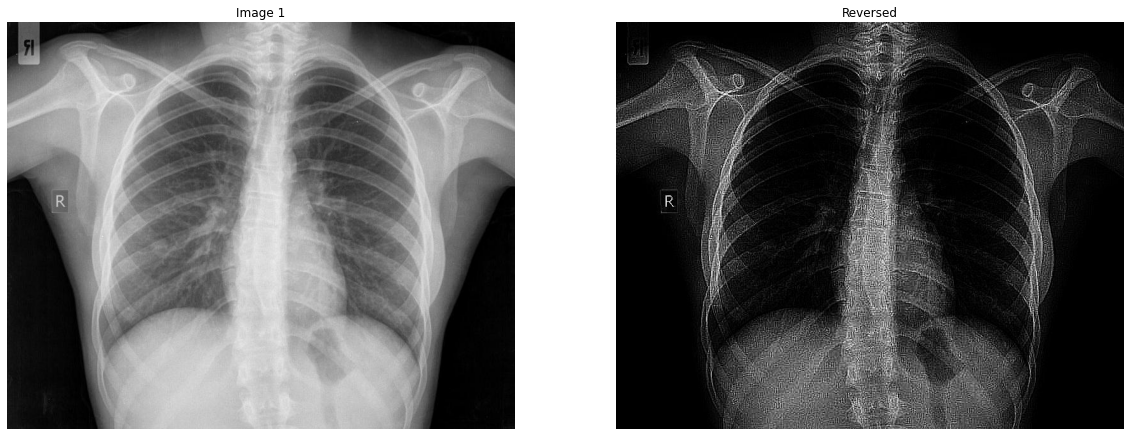

In [ ]:
# get the photographic negative
res = (255-image5_2)
fig, axes = plt.subplots(1, 3, figsize=(20,15))
plt.subplot(121), plt.imshow(image5_1, cmap='gray'),plt.title('Image 1'), plt.axis('off')
plt.subplot(122), plt.imshow(res, cmap='gray'), plt.title('Reversed'), plt.axis('off')
plt.show()

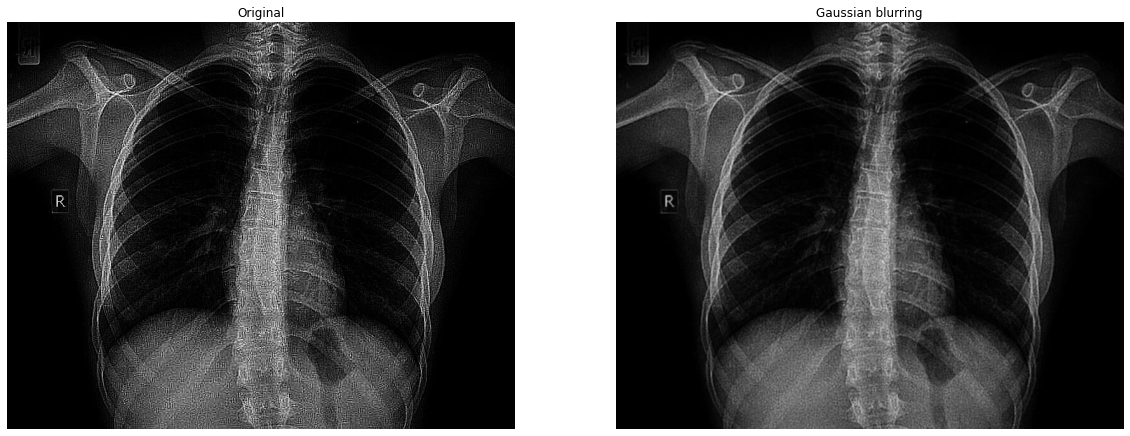

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,15))

plt.subplot(121), plt.imshow(np.array(res), cmap='gray'), plt.title('Original'), plt.axis('off')

# apply GaussianBlur
blur = cv.GaussianBlur(np.array(res),(3,3), 3)
plt.subplot(122), plt.imshow(blur, cmap='gray'), plt.title('Gaussian blurring'), plt.axis('off')

plt.show()

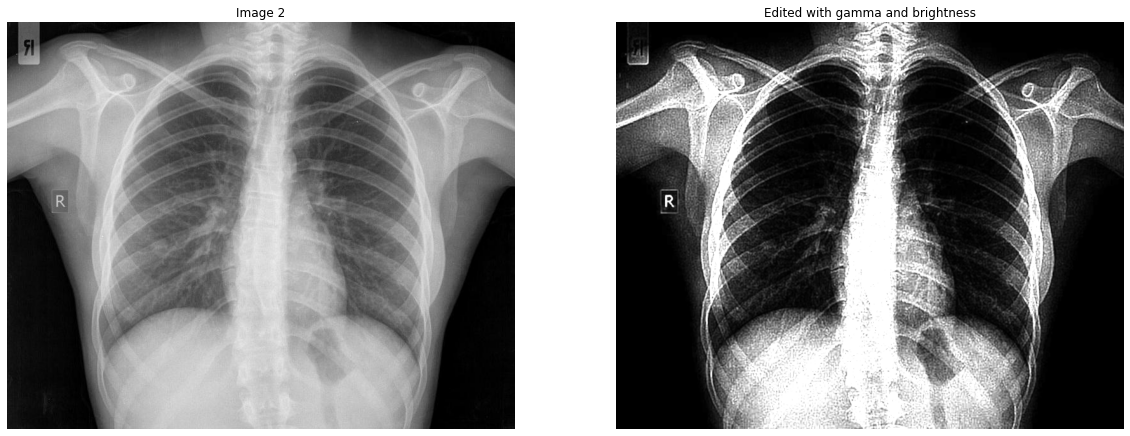

In [ ]:
# Enhance Brightness
curr_bri = ImageEnhance.Brightness(Image.fromarray(blur))
new_bri = 2.5

img_brightened = curr_bri.enhance(new_bri)

fig, axes = plt.subplots(1, 2, figsize=(20,15))
plt.subplot(121), plt.imshow(image5_1, cmap='gray'), plt.title('Image 2'),plt.axis('off')
plt.subplot(122), plt.imshow(img_brightened, cmap='gray'), plt.title('Edited with gamma and brightness'),plt.axis('off')

plt.show()

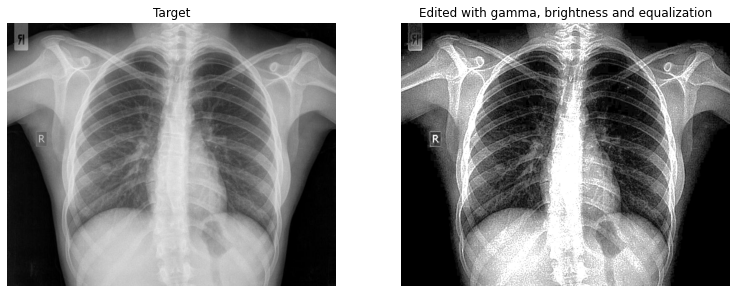

In [ ]:
# apply histogram equalization
hist, bins = np.histogram(np.array(img_brightened).flatten(),256,[0,256])

cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()

cdf_m=np.ma.masked_equal(cdf,0)
cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf2=np.ma.filled(cdf_m,0).astype('uint8')

img2=cdf2[np.array(img_brightened)]

fig, axes = plt.subplots(1, 2, figsize=(20,15))
plt.subplot(131), plt.imshow(image5_1, cmap='gray'), plt.title('Target'),plt.axis('off')
plt.subplot(132), plt.imshow(img2, cmap='gray'), plt.title('Edited with gamma, brightness and equalization'),plt.axis('off')
plt.show()

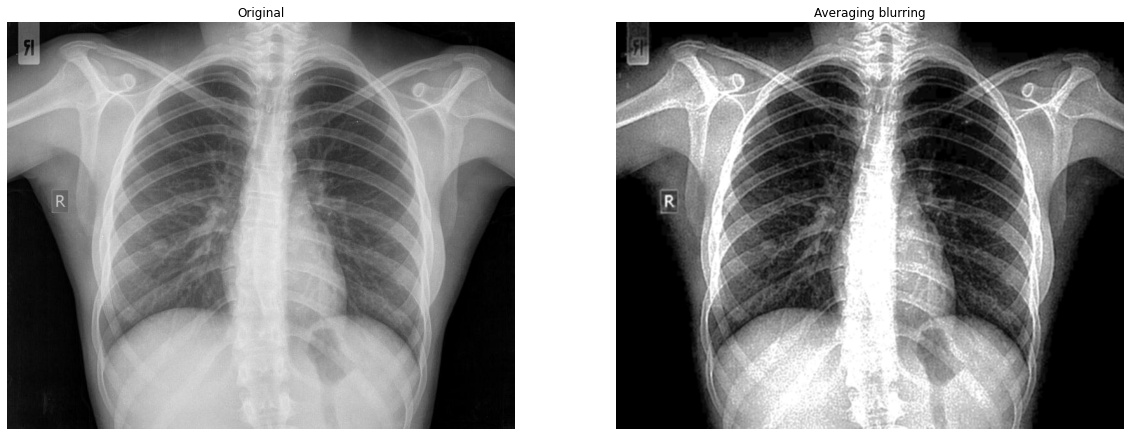

In [ ]:
fig, axes=plt.subplots(2,2, figsize=(20,15))

plt.subplot(121), plt.imshow(image5_1, cmap='gray'), plt.title('Original'),plt.axis('off')

# apply 3x3 blur
blur1=cv.blur(img2,(3,3))
plt.subplot(122), plt.imshow(blur1, cmap='gray'), plt.title('Averaging blurring'), plt.axis('off')

plt.show()